Imports:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import k3d

Helper functions:

In [35]:
def load_lidar_bin(file_path):
    """Load a .bin LiDAR file (KITTI format)."""
    points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)
    return points[:, :3]


def plot_img(image_path_left, image_path_right, figsize=(22, 6)):
    """Function to plot two images side by side with a larger display."""
    try:
        img_left = mpimg.imread(image_path_left)
        img_right = mpimg.imread(image_path_right)

        if img_left.shape[0] != img_right.shape[0]:
            print("Warning: Images have different heights. Resizing is not supported in this function.")

        combined_img = np.hstack((img_left, img_right))

        plt.figure(figsize=figsize)
        plt.imshow(combined_img)
        plt.axis("off")
        plt.show()

    except FileNotFoundError as e:
        print(f"Error: File not found! - {e.filename}")

def extract_labels(file_path):
    columns = [
        "ObjectType", "Truncation", "Occlusion", "Alpha", 
        "X1", "Y1", "X2", "Y2",  # 2D bounding box (xmin, ymin, xmax, ymax)
        "H", "W", "L",           # 3D dimensions (height, width, length)
        "X", "Y", "Z",           # 3D location in camera coordinates
        "Rotation_Y"             # Rotation around Y-axis
    ]
    
    data = []
    
    with open(file_path, "r") as file:
        for line in file:
            values = line.strip().split()  # Split line by whitespace
            object_data = {
                columns[i]: values[i] if i == 0 else float(values[i])  # Keep ObjectType as string, rest as float
                for i in range(len(columns))
            }
            data.append(object_data)
    
    return pd.DataFrame(data)




Plotting the datapoints:


/home/feddelaptop/computer_vision/Dataset/data_object_label_2/training/label_2/000001.txt


Output()

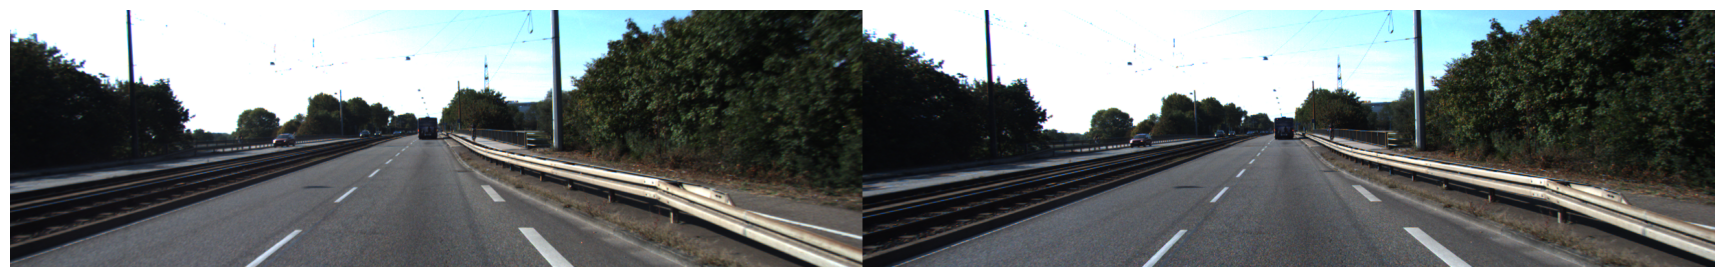

  ObjectType  Truncation  Occlusion  Alpha      X1      Y1      X2      Y2  \
0      Truck         0.0        0.0  -1.57  599.41  156.40  629.75  189.25   
1        Car         0.0        0.0   1.85  387.63  181.54  423.81  203.12   
2    Cyclist         0.0        3.0  -1.65  676.60  163.95  688.98  193.93   
3   DontCare        -1.0       -1.0 -10.00  503.89  169.71  590.61  190.13   
4   DontCare        -1.0       -1.0 -10.00  511.35  174.96  527.81  187.45   
5   DontCare        -1.0       -1.0 -10.00  532.37  176.35  542.68  185.27   
6   DontCare        -1.0       -1.0 -10.00  559.62  175.83  575.40  183.15   

      H     W      L        X        Y        Z  Rotation_Y  
0  2.85  2.63  12.34     0.47     1.49    69.44       -1.56  
1  1.67  1.87   3.69   -16.53     2.39    58.49        1.57  
2  1.86  0.60   2.02     4.59     1.32    45.84       -1.55  
3 -1.00 -1.00  -1.00 -1000.00 -1000.00 -1000.00      -10.00  
4 -1.00 -1.00  -1.00 -1000.00 -1000.00 -1000.00      -10.00  
5 -

In [40]:

file_path_dataset = "/home/feddelaptop/computer_vision/Dataset"
lidar_relative_path = "/data_object_velodyne/training/velodyne/{:06d}.bin"
left_img_relative_path = "/data_object_image_2/training/image_2/{:06d}.png"
right_img_relative_path = "/data_object_image_3/training/image_3/{:06d}.png"
labels_relative_path = "/data_object_label_2/training/label_2/{:06d}.txt"

sequence_number = 1


lidar_path = file_path_dataset + lidar_relative_path.format(sequence_number)
left_img_path = file_path_dataset + right_img_relative_path.format(sequence_number)
right_img_path = file_path_dataset + left_img_relative_path.format(sequence_number)
labels_path = file_path_dataset + labels_relative_path.format(sequence_number)

print(labels_path)

lidar_points = load_lidar_bin(lidar_path)

#Plot the lidar points
plot = k3d.plot()
point_cloud = k3d.points(lidar_points, point_size=0.05, color=0x0000ff)
plot += point_cloud
plot.display()


plot_img(left_img_path, right_img_path)
labels = extract_labels(labels_path)
print(labels)
# Show the plot
